IMPORT LIBRARY

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

FUNCTIONS

In [2]:
def sigmoid_func(x):
  hit = 1/(1 + np.exp(-x))
  return hit

def der(x): #Derivatif
  hit_sigm = sigmoid_func(x) * (1 - sigmoid_func(x))
  return hit_sigm

def calculate_url_length(url):
  '''Fungsi untuk menghitung total panjang link url'''
  return len(url)

def calculate_www(url):
  hostlen = urlparse(url)
  hostlen = hostlen.hostname
  host_www = 1 if hostlen and 'www' in hostlen.lower() else 0
  return host_www

def calculate_com(url):
  hostlen = urlparse(url)
  hostlen = hostlen.hostname
  host_com = 1 if hostlen and '.com' in hostlen.lower() else 0
  return host_com

def calculate_dot(url):
    hostlen = urlparse(url).hostname
    if hostlen:
        host_dot = hostlen.lower().count('.')
        return host_dot
    else:
        return 0

def calculate_slash(url):
    path = urlparse(url).path
    slash_count = path.count('/')
    return slash_count

def count_digits(url):
    digit_count = sum(char.isdigit() for char in url)
    return digit_count

def calculate_hostname_length(url):
  parsed_url = urlparse(url)
  return len(parsed_url.netloc)

def calculate_ratio_digits(string):
    if len(string) == 0:
        return 0
    digit_count = sum(char.isdigit() for char in string)
    return digit_count / len(string)

def data_cleaning(df):
    duplicate_rows = df.duplicated()

    duplicate_data = df[duplicate_rows]
    print("Duplicate Rows:")
    print(duplicate_data)
    df_cleaned = df.drop_duplicates()
    return df_cleaned

def output_link(in_model, url1, url2):
  link1, link2 = in_model
  if link1 == 0 and link2 == 0:
    print(f'{url1} and {url2} is legitimate link')
  elif link1 == 1 and link2 == 1:
    print(f'URL1 and URL2 is phishing link')
  elif link1 == 0 and link2 == 1:
    print(f'{url1} is legitimate link and URL2 is phishing')
  elif link1 == 1 and link2 == 0:
    print(f'URL1 is phishing and {url2} is legitimate link')
  else:
    print(f'input not found')

def clf_rf_class(dataX, dataY, tsize, rstate):
  X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=tsize, random_state=rstate)
  sc = MinMaxScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  best_score = 0
  for n_esti in [10, 20, 30, 40, 50, 100]:
    clfRFR = RandomForestClassifier(n_estimators=n_esti, random_state=rstate)
    clfRFR.fit(X_train, y_train)
    score = clfRFR.score(X_test, y_test)
    if score > best_score:
      best_score = score
      total_tree = {'n_estimators': n_esti}
  return(best_score, total_tree, clfRFR)



READ AND MERGE DATASET

In [3]:
# Load datasets
floadDt1 = pd.read_excel(r'D:\portofolio\projects\Phishing\dataset_final.xlsx')
# floadDt2 = pd.read_excel(r'/content/drive/MyDrive/phishing/dataset/dataset_tambahan.xlsx')
# floadDt3 = pd.read_excel(r'/content/drive/MyDrive/phishing/dataset/Dataset.xlsx')
# floadDt4 = pd.read_excel(r'/content/drive/MyDrive/phishing/dataset/PhiUSIIL_Phishing_URL_Dataset.xlsx')

status_map = {'phishing': 1, 'legitimate': 0}
floadDt1['status'] = floadDt1['status'].map(status_map)
# floadDt2['status'] = floadDt2['status'].map(status_map)
# floadDt3['status'] = floadDt3['status'].map(status_map)
# floadDt4['status'] = floadDt3['status'].map(status_map)

floadDt = pd.concat([floadDt1], ignore_index=True)


FEATURE ENGINEERING

In [4]:
floadDt = pd.DataFrame(floadDt)
floadDt['length_url'] = floadDt['url'].apply(lambda url: len(str(url)))
floadDt['nb_www'] = floadDt['url'].apply(calculate_www)
floadDt['nb_com'] = floadDt['url'].apply(calculate_com)
floadDt['length_dot'] = floadDt['url'].apply(calculate_dot)
floadDt['length_slash'] = floadDt['url'].apply(calculate_slash)
floadDt['length_digits'] = floadDt['url'].apply(count_digits)
floadDt['length_hostname'] = floadDt['url'].apply(calculate_hostname_length)
floadDt['ratio_digits_url'] = floadDt['url'].apply(calculate_ratio_digits)
floadDt['status'] = floadDt['status']
floadDt['Hostname'] = floadDt['url'].apply(lambda url: urlparse(url).netloc)
floadDt['ratio_digits_host'] = floadDt['Hostname'].apply(calculate_ratio_digits)
floadDt

,url,status,length_url,nb_www,nb_com,length_dot,length_slash,length_digits,length_hostname,ratio_digits_url,Hostname,ratio_digits_host
0,http://www.progarchives.com/album.asp?id=61737,1,46,1,1,2,1,5,20,0.108696,www.progarchives.com,0.000000
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,1,128,0,1,10,1,7,120,0.054688,signin.eday.co.uk.ws.edayisapi.dllsign.inusing...,0.058333
2,http://www.avevaconstruction.com/blesstool/ima...,1,52,1,1,2,2,0,25,0.000000,www.avevaconstruction.com,0.000000
3,http://www.jp519.com/,0,21,1,1,2,1,3,13,0.142857,www.jp519.com,0.230769
4,https://www.velocidrone.com/,0,28,1,1,2,1,0,19,0.000000,www.velocidrone.com,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85006,http://www.grupolyl.com/slap/GD/,1,32,1,1,2,3,0,16,0.000000,www.grupolyl.com,0.000000
85007,http://bcgroup-sa.com/nilalalaa/GD/index.php,1,44,0,1,1,3,0,14,0.000000,bcgroup-sa.com,0.000000
85008,http://mainepta.org/eme/gm/excel/excel/excel.p...,1,286,0,0,1,5,62,12,0.216783,mainepta.org,0.000000
85009,http://support.escola-olivera.org/GOOGLENEWW/G...,1,95,0,0,2,8,0,26,0.000000,support.escola-olivera.org,0.000000


DATA CLEANING

In [5]:
floadDt = data_cleaning(floadDt)
print("Data Setelah Data Cleaning:")
floadDt


Duplicate Rows:
                                                     url  status  length_url  \
5374   http://e710z0ear.du.r.appspot.com/c:/users/use...       1          54   
7813   http://xxxfoxwew.wn.r.appspot.com/jsmith@imaph...       1          53   
7814   http://kuchkuchnights.com/blog/?sec=Laurine%20...       1          52   
7815   https://www.onlinesbi.com/personal/etdr_estdr_...       0          54   
7816                      https://www.nextgeneration.ie/       0          30   
...                                                  ...     ...         ...   
84855  http://nongshangzichan.com/gh/css/DHL%20AUTO/d...       1         276   
84913    http://extra-cash-from-home.com/GoogleDocument/       1          47   
84990   http://www.thefantasticmom.com/images/gggg/gtex/       1          48   
84993  http://nongshangzichan.com/gh/css/DHL%20AUTO/d...       1         276   
85006                   http://www.grupolyl.com/slap/GD/       1          32   

       nb_www  nb_com  

,url,status,length_url,nb_www,nb_com,length_dot,length_slash,length_digits,length_hostname,ratio_digits_url,Hostname,ratio_digits_host
0,http://www.progarchives.com/album.asp?id=61737,1,46,1,1,2,1,5,20,0.108696,www.progarchives.com,0.000000
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,1,128,0,1,10,1,7,120,0.054688,signin.eday.co.uk.ws.edayisapi.dllsign.inusing...,0.058333
2,http://www.avevaconstruction.com/blesstool/ima...,1,52,1,1,2,2,0,25,0.000000,www.avevaconstruction.com,0.000000
3,http://www.jp519.com/,0,21,1,1,2,1,3,13,0.142857,www.jp519.com,0.230769
4,https://www.velocidrone.com/,0,28,1,1,2,1,0,19,0.000000,www.velocidrone.com,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
85005,http://www.grupolyl.com/slap/GD/,1,32,1,1,2,3,0,16,0.000000,www.grupolyl.com,0.000000
85007,http://bcgroup-sa.com/nilalalaa/GD/index.php,1,44,0,1,1,3,0,14,0.000000,bcgroup-sa.com,0.000000
85008,http://mainepta.org/eme/gm/excel/excel/excel.p...,1,286,0,0,1,5,62,12,0.216783,mainepta.org,0.000000
85009,http://support.escola-olivera.org/GOOGLENEWW/G...,1,95,0,0,2,8,0,26,0.000000,support.escola-olivera.org,0.000000


CHECK NULL

In [6]:
# Mengecek apakah ada nilai null di dataframe floadDt
null_values = floadDt.isnull().sum()

# Menampilkan jumlah nilai null untuk setiap kolom
print(null_values)


url                  0
status               0
length_url           0
nb_www               0
nb_com               0
length_dot           0
length_slash         0
length_digits        0
length_hostname      0
ratio_digits_url     0
Hostname             0
ratio_digits_host    0
dtype: int64


In [7]:
floadDt = floadDt.dropna()
print("Data Setelah Menghilangkan Nilai Null:")
floadDt

null_status = floadDt['status'].isnull().sum()
print("Jumlah nilai null di kolom status setelah pembersihan data:", null_status)
floadDt.to_excel(r'D:\portofolio\projects\Phishing\dataafterclean.xlsx', index=False)

Data Setelah Menghilangkan Nilai Null:
Jumlah nilai null di kolom status setelah pembersihan data: 0


DATA ENGINEERING

In [8]:
floadDt['status'] = floadDt['status'].astype(int)
print(floadDt)


                                                     url  status  length_url  \
0         http://www.progarchives.com/album.asp?id=61737       1          46   
1      http://signin.eday.co.uk.ws.edayisapi.dllsign....       1         128   
2      http://www.avevaconstruction.com/blesstool/ima...       1          52   
3                                  http://www.jp519.com/       0          21   
4                           https://www.velocidrone.com/       0          28   
...                                                  ...     ...         ...   
85005                   http://www.grupolyl.com/slap/GD/       1          32   
85007       http://bcgroup-sa.com/nilalalaa/GD/index.php       1          44   
85008  http://mainepta.org/eme/gm/excel/excel/excel.p...       1         286   
85009  http://support.escola-olivera.org/GOOGLENEWW/G...       1          95   
85010  http://support.escola-olivera.org/GOOGLENEWW/G...       1          56   

       nb_www  nb_com  length_dot  leng

In [9]:
# scaler = MinMaxScaler()
# features_to_normalize = ['length_url', 'length_hostname', 'length_dot','length_digits', 'length_slash']
# floadDt[features_to_normalize] = scaler.fit_transform(floadDt[features_to_normalize])
# print("Data Setelah Normalisasi:")
# print(floadDt)

In [10]:
# Print data types of variables
print(floadDt.dtypes)

url                   object
status                 int32
length_url             int64
nb_www                 int64
nb_com                 int64
length_dot             int64
length_slash           int64
length_digits          int64
length_hostname        int64
ratio_digits_url     float64
Hostname              object
ratio_digits_host    float64
dtype: object


EDA

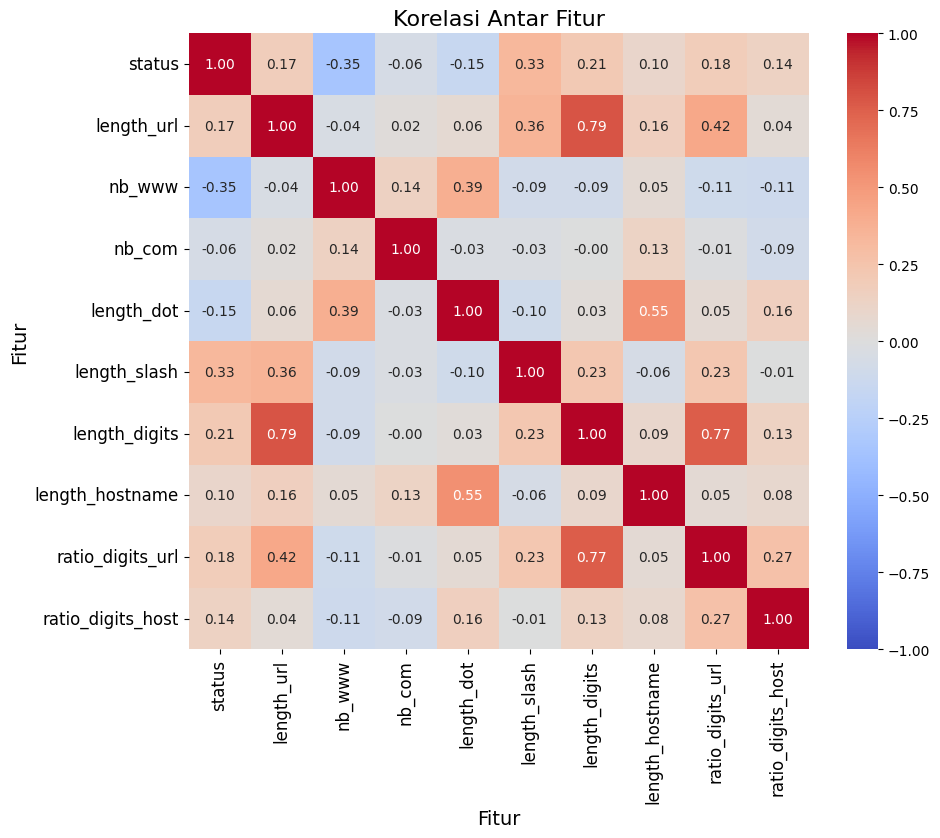

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the 'url' column is not included in the correlation matrix
data_without_url = floadDt.drop(columns=['url', 'Hostname'])

# Compute the correlation matrix excluding the 'url' column
correlation_matrix = data_without_url.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Customize the heatmap
plt.title('Korelasi Antar Fitur', fontsize=16)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Fitur', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


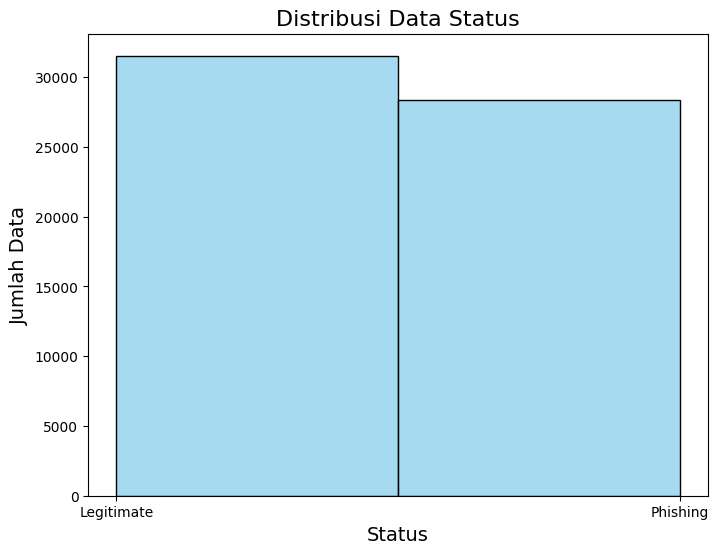

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=floadDt, x='status', bins=2, kde=False, color='skyblue')
plt.title('Distribusi Data Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=14)
plt.xticks([0, 1], ['Legitimate', 'Phishing'])  # Mengubah label sumbu x
plt.show()


In [13]:
# Menampilkan informasi tentang DataFrame
floadDt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 59899 entries, 0 to 85010
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                59899 non-null  object 
 1   status             59899 non-null  int32  
 2   length_url         59899 non-null  int64  
 3   nb_www             59899 non-null  int64  
 4   nb_com             59899 non-null  int64  
 5   length_dot         59899 non-null  int64  
 6   length_slash       59899 non-null  int64  
 7   length_digits      59899 non-null  int64  
 8   length_hostname    59899 non-null  int64  
 9   ratio_digits_url   59899 non-null  float64
 10  Hostname           59899 non-null  object 
 11  ratio_digits_host  59899 non-null  float64
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 5.7+ MB


In [14]:
# Mengetahui jumlah masing-masing label di kolom 'status'
status_counts = floadDt['status'].value_counts()

# Menampilkan jumlah masing-masing label
print("Jumlah data 'Legitimate':", status_counts[0])
print("Jumlah data 'Phishing':", status_counts[1])

Jumlah data 'Legitimate': 31544
Jumlah data 'Phishing': 28355


In [15]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Split features and target variable
X = floadDt.drop(columns=['url', 'status', 'Hostname'])
y = floadDt['status']

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Distribusi Kelas setelah Oversampling:")
print(y_resampled.value_counts())

# Now you can use X_resampled and y_resampled for modeling


Distribusi Kelas setelah Oversampling:
status
1    31544
0    31544
Name: count, dtype: int64


MODELLING

(0.8598827072436203, {'n_estimators': 100}, RandomForestClassifier(random_state=0))
(0.8533840545252813, {'n_estimators': 100}, RandomForestClassifier(random_state=1))
(0.8579806625455698, {'n_estimators': 100}, RandomForestClassifier(random_state=2))
(0.8538595656997939, {'n_estimators': 100}, RandomForestClassifier(random_state=3))
(0.8546520843239817, {'n_estimators': 100}, RandomForestClassifier(random_state=4))
Nilai Rataan Model: 0.8559518148676494


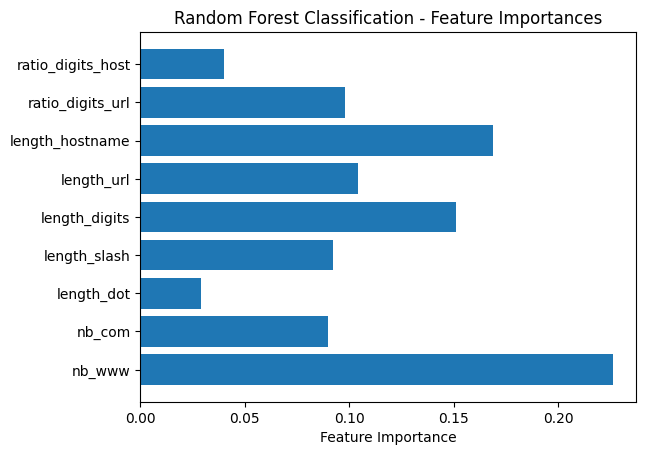

In [16]:
dt_x = X_resampled
dt_y = y_resampled

total_hit_model = 0
for i in range(5):
  hit_model = clf_rf_class(dt_x, dt_y, 0.1, i)
  total_hit_model += hit_model[0]
  print(hit_model)

rat_model = total_hit_model / 5
print('Nilai Rataan Model:', rat_model)

with open('m1_rf_mean_acc87p.pkl','wb') as model:
  pickle.dump(hit_model, model)

with open('m1_rf_mean_acc87p.pkl', 'rb') as model:
    load_model = pickle.load(model)

joblib.dump(load_model, 'm1_rf_mean_acc87p.joblib')

clfRFR = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, min_samples_split=2, min_samples_leaf=1, max_features='auto')
clfRFR = hit_model[2]
clfRFR.fit(dt_x, dt_y)
feature_importances = clfRFR.feature_importances_
feature_names = ["nb_www", "nb_com", 'length_dot', 'length_slash' ,'length_digits',"length_url", "length_hostname", "ratio_digits_url", "ratio_digits_host"]

plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest Classification - Feature Importances")
plt.show()

IMPLEMENTATION

In [21]:
import pickle
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Pisahkan fitur dan target
X = floadDt[['nb_www', 'nb_com', 'length_dot', 'length_slash', 'length_digits', 'length_url', 'length_hostname', 'ratio_digits_url', 'ratio_digits_host']]
y = floadDt['status']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada set pelatihan
rf_classifier.fit(X_train, y_train)

# Simpan model ke dalam file pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Simpan model ke dalam file joblib
dump(rf_classifier, 'random_forest_model.joblib')

# Lakukan prediksi pada set pengujian
y_pred = rf_classifier.predict(X_test)

# Tampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[5442  865]
 [ 909 4764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6307
           1       0.85      0.84      0.84      5673

    accuracy                           0.85     11980
   macro avg       0.85      0.85      0.85     11980
weighted avg       0.85      0.85      0.85     11980



In [18]:
url1 = input("Enter the first URL: ")
url2 = input("Enter the second URL: ")
f1 = [calculate_www(url1),calculate_www(url2)]
f2 = [calculate_com(url1),calculate_com(url2)]
f3 = [calculate_dot(url1),calculate_dot(url2)]
f4 = [calculate_slash(url1),calculate_slash(url2)]
f5 = [count_digits(url1),count_digits(url2)]
f6 = [len(url1), len(url2)]
f7 = [calculate_hostname_length(url1),calculate_hostname_length(url2)]
f8 = [calculate_ratio_digits(url1),calculate_ratio_digits(url2)]
f9 = [calculate_ratio_digits(urlparse(url1).netloc),calculate_ratio_digits(urlparse(url2).netloc)]

new_data = pd.DataFrame({'nb_www':f1, 'nb_com':f2, 'length_dot':f3, 'length_slash':f4,'length_digits':f5,'length_url':f6, 'length_hostname':f7, 'ratio_digits_url':f8,
                         'ratio_digits_host':f9})
# predictions_rfr = clfRFR.predict(new_data)
lm = load_model[2]
predictions_rfr = lm.predict(new_data)
new_predictions = rf_classifier.predict(new_data)
output_link(new_predictions, url1, url2)


URL1 and URL2 is phishing link


c:\Users\ASUS VivoBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


EVALUATION & *RETEST*

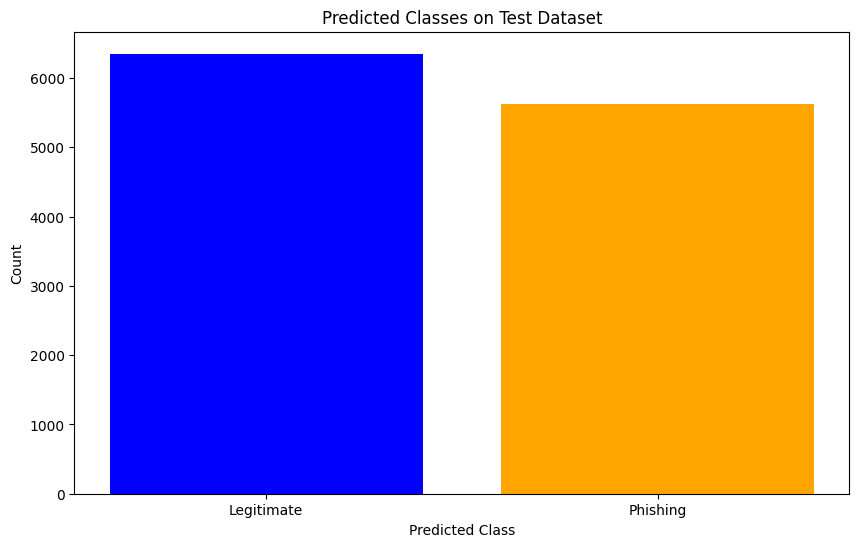

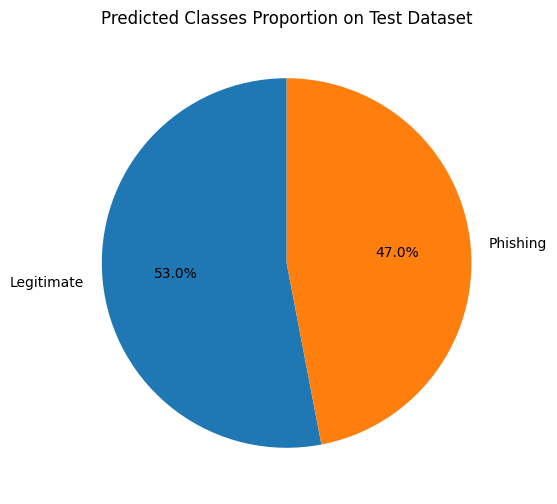

In [19]:
# Lakukan prediksi pada set pengujian
y_pred_test = rf_classifier.predict(X_test)

# Membuat diagram batang untuk perbandingan prediksi pada dataset pengujian
plt.figure(figsize=(10, 6))
plt.bar(['Legitimate', 'Phishing'], np.bincount(y_pred_test), color=['blue', 'orange'])
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Predicted Classes on Test Dataset')
plt.show()

# Membuat diagram lingkaran untuk proporsi kategori prediksi pada dataset pengujian
plt.figure(figsize=(6, 6))
plt.pie(np.bincount(y_pred_test), labels=['Legitimate', 'Phishing'], autopct='%1.1f%%', startangle=90)
plt.title('Predicted Classes Proportion on Test Dataset')
plt.show()


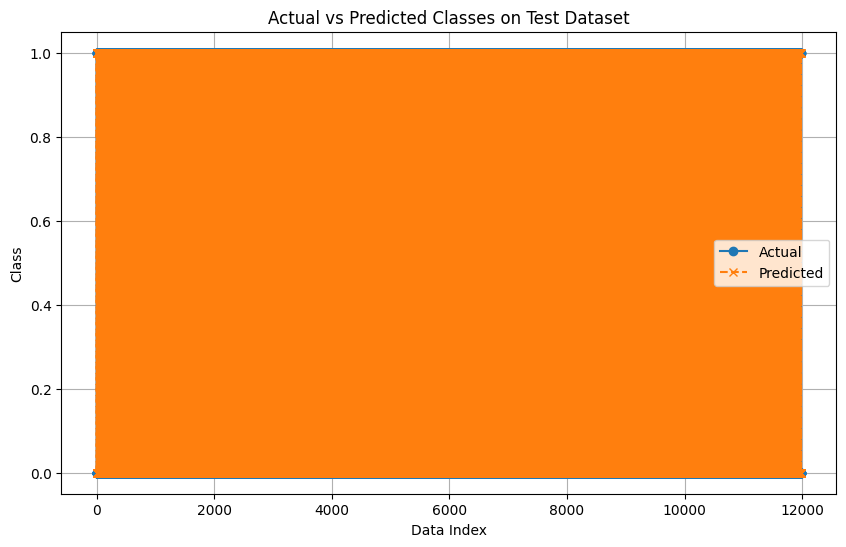

In [20]:
# Buat array dengan indeks data
indices = np.arange(len(y_test))

# Membuat plot untuk nilai aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, marker='o', linestyle='-', label='Actual')
plt.plot(indices, y_pred, marker='x', linestyle='--', label='Predicted')

plt.xlabel('Data Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Classes on Test Dataset')
plt.legend()
plt.grid(True)
plt.show()
